# Maksym Drosiński, 264380

### Zadanie #1 - oceny studentów

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [85]:
def round_grade(grade):
    floored = math.floor(grade)

    if grade > floored + 0.5:
        return floored + 0.5
    else:
        return floored

In [86]:
grades = pd.read_csv('oceny_studentow.csv', sep=',', usecols=[1, 2, 3])
grades['ocena_kon'] = 0.6 * grades['ocena_wyk'] + 0.4 * grades['ocena_lab']
grades['ocena_kon'] = grades['ocena_kon'].apply(lambda x: round_grade(x))

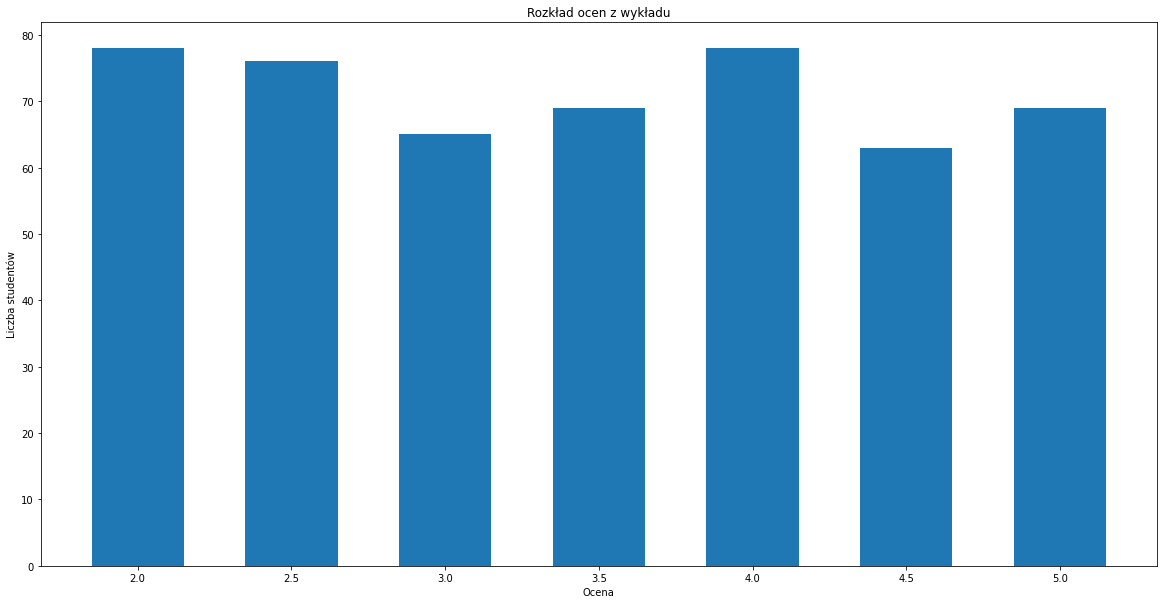

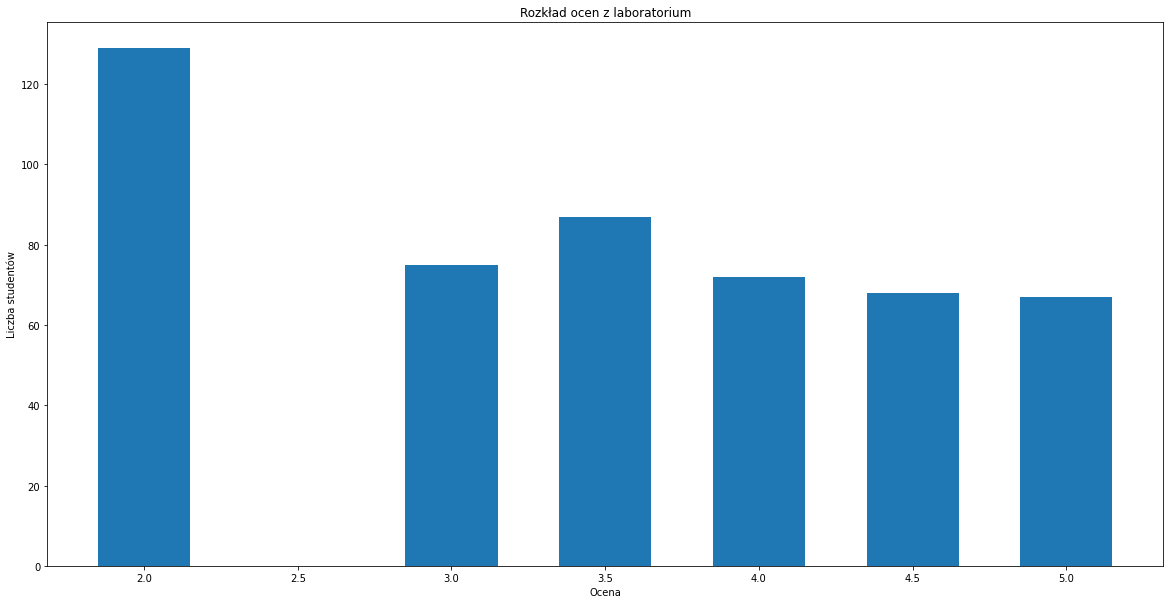

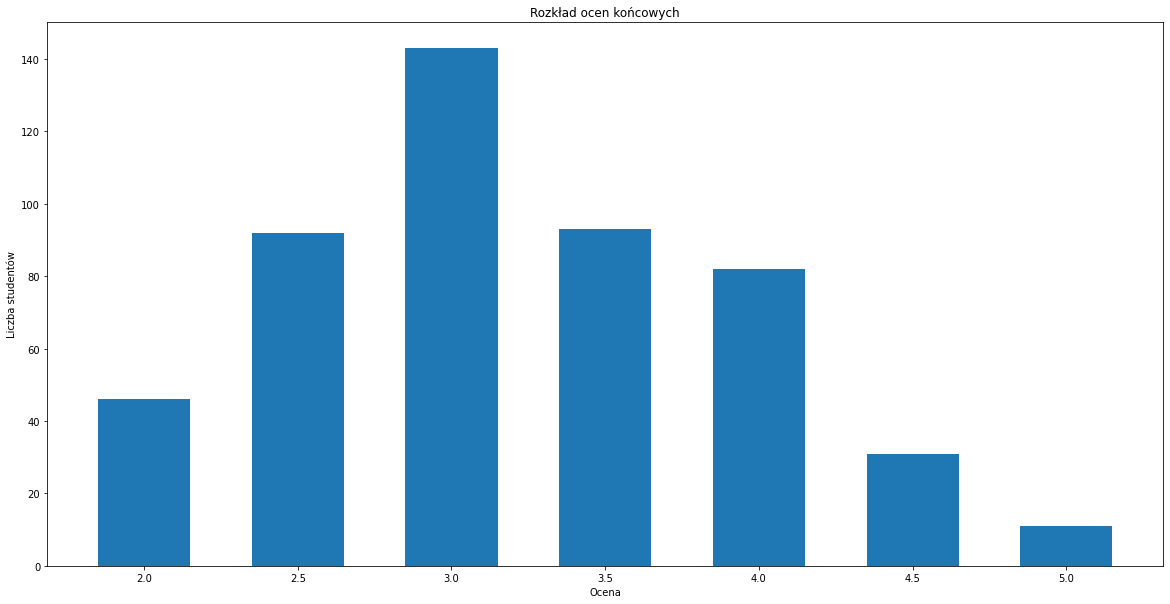

In [87]:
labels_wyk, counts_wyk = np.unique(grades['ocena_wyk'], return_counts=True)
labels_lab, counts_lab = np.unique(grades['ocena_lab'], return_counts=True)
labels_kon, counts_kon = np.unique(grades['ocena_kon'], return_counts=True)

plt.figure(figsize=(20, 10))
plt.bar(labels_wyk, counts_wyk, align='center', width=0.3)
plt.xlabel('Ocena')
plt.ylabel('Liczba studentów')
plt.title('Rozkład ocen z wykładu')

plt.figure(figsize=(20, 10))
plt.bar(labels_lab, counts_lab, align='center', width=0.3)
plt.xlabel('Ocena')
plt.ylabel('Liczba studentów')
plt.title('Rozkład ocen z laboratorium')

plt.figure(figsize=(20, 10))
plt.bar(labels_kon, counts_kon, align='center', width=0.3)
plt.xlabel('Ocena')
plt.ylabel('Liczba studentów')
plt.title('Rozkład ocen końcowych')

plt.show()

In [88]:
summary = pd.DataFrame(columns=['data_type', 'data_value'])

summary = summary.append({'data_type': 'Liczba studentów', 'data_value': grades.shape[0]}, ignore_index=True)
summary = summary.append({'data_type': 'Średnia ocena z wykładu', 'data_value': np.mean(grades['ocena_wyk'])}, ignore_index=True)
summary = summary.append({'data_type': 'Średnia ocena z laboratorium', 'data_value': np.mean(grades['ocena_lab'])}, ignore_index=True)
summary = summary.append({'data_type': 'Średnia ocena końcowa', 'data_value': np.mean(grades['ocena_kon'])}, ignore_index=True)
summary = summary.append({'data_type': 'Liczba zaliczeń', 'data_value': np.count_nonzero(grades['ocena_kon'] >= 3.0)}, ignore_index=True)
summary = summary.append({'data_type': 'Liczba niezaliczeń', 'data_value': np.count_nonzero(grades['ocena_kon'] < 3.0)}, ignore_index=True)

for i in [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]:
    summary = summary.append({'data_type': 'Liczba osób z oceną końcową ' + str(i), 'data_value': np.count_nonzero(grades['ocena_kon'] == i)}, ignore_index=True)

summary.to_csv('podsumowanie.csv', index=False)

### Zadanie #2 - kondensator
Narysuj wykresy napięć ładowania i rozładowania kondensatora w czasie dla wybranych wartości C i R:

- $C=470\mu F$
- $C=940\mu F$
- $R=6,25k\Omega$

Dobierz zakres czasu tak, aby wykres był czytelny. Przyjmij napięcie zasilania $U_Z = 6V$

Pamiętaj, o dodaniu do wykresu wszystkich niezbędnych elementów!

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

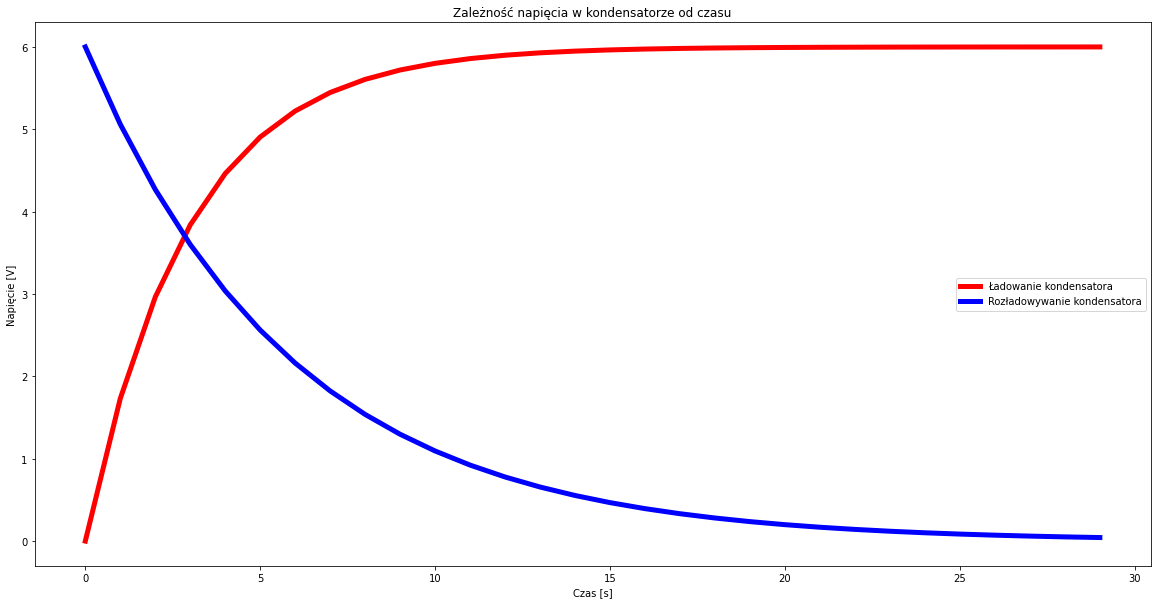

In [90]:
C1 = 470e-6
C2 = 940e-6
R = 6.25e3
Uz = 6

time = np.arange(0, 30, 1)
u_load = np.zeros(30)
u_unload = np.zeros(30)

for t in time:
    u_load[t] = Uz * (1 - math.exp(-t / (R * C1)))
    u_unload[t] = Uz * math.exp(-t / (R * C2))

plt.figure(figsize=(20, 10))
plt.plot(time, u_load, 'r-', linewidth=5)
plt.plot(time, u_unload, 'b-', linewidth=5)
plt.xlabel('Czas [s]')
plt.ylabel('Napięcie [V]')
plt.title('Zależność napięcia w kondensatorze od czasu')
plt.legend(['Ładowanie kondensatora', "Rozładowywanie kondensatora"])
plt.show()